# Space Station Design Lab
## PH 211 COCC
### Bruce Emerson 2/26/2020

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Space Station](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211Labspacestation.html) and [Sandbox Lab Discussion](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabDspacestation.html)

There are two features to this lab beyond merely an exploration of circular motion concepts. One of these is the design experience which is to say the search for a solution problem which meets certain constraints and the other is realizing that you can build a host of different paths towards that solution depending on what makes sense to you.

As you will see from the lab statement above the core idea is to determine the size and rotation rate of a space colony (of the trash can variety) that meets a number of criteria. I won't repeat them here.

## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab. 


The following code cell will need to be run first before any other code cells.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### The simple physics model...

Because this is a circular motion problem and all such problems are a particular case of a Newton's Law problem we start with a freebody diagram. As you do this stop and think what it means when your body 'feels' a force of 1g. As we have discussed in class the force of gravity is pretty much undectable through our senses. The other forces that act on us because of gravity are what we 'feel'!

The basic tool for circular motion is:  

$$ \sum_{all} F_{radial} = m\frac{v^2}{r}$$




### Your Drawing

One of the first deliverables is to include a drawing of your space station design. I will include one here that is **NOT** a real solution to the problem but will provide a place holder for you. The following is one way you can use to insert an image and manage the size of the image displayed.

`<img src="https://raw.githubusercontent.com/smithrockmaker/PH211/master/images/spacestation.jpg" />`

<img src="https://raw.githubusercontent.com/smithrockmaker/PH211/master/images/spacestation.jpg" />


By Rick Guidice - NASA Ames Research Center
http://settlement.arc.nasa.gov/70sArtHiRes/70sArt/art.html, Public Domain, https://commons.wikimedia.org/w/index.php?curid=26938951

### Calculational Section

In this section I am making all of the different calculations that come up as part of my investigations. As I decide I want to plot something I come back to this cell and do the calculation to I don't have to hunt all over the place for what I'm doing. I can just rerun this cell each time to regenerate old and new data as I change my approach.

Be careful to check any work that I have done against your formulae since I have embedded a number of intentional errors.

### Note:

This section gives an error because at one point it divides by 0 which is a no no. I did worry about fixing it because, as long as I don't try to plot the 'infinite' y value, there isn't a problem.

In [3]:
# constants
gravity = 9.817
velocity_edge = 47.
period_edge = 30.

# generate x values for model of data
maxradius = 400.
numpoints = 200
range_radius = np.linspace(0.,maxradius,maxradius+1)

# create lists that I will use in the future
period_r = np.full_like(range_radius,0)
speed_r = np.full_like(range_radius,0)
twenty_up = np.full_like(range_radius,0)
twenty_better = np.full_like(range_radius,0)
    
for i, radius in enumerate(range_radius):
    speed_r[i] = np.sqrt(gravity*radius)
    period_r[i] = 2.1*np.sqrt(4.*np.pi*radius/(1.4*gravity))
    twenty_up[i] = velocity_edge**2/radius
    twenty_better[i] = 3.9*np.pi**2*radius/(period_edge**2)

# print("testing the output of the loop;", modelheight)

/Users/bruceemerson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


### The Relationship Between Velocity and Radius for 1g

If you assume that the normal force is 1g (what you want) then you can find a relationship between the period and the radius of the space station. I won't derive that for you but what is plotted below is a version of it.

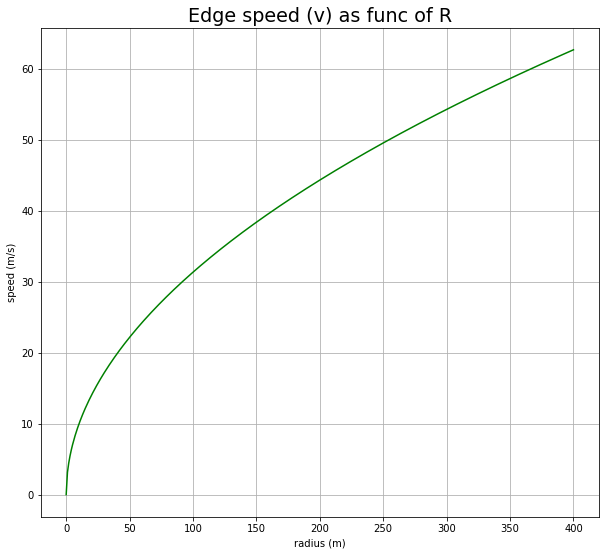

In [4]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.plot(range_radius, speed_r,
            color = 'green')

# draw a horizontal or vertical line across the plot to show some feature
#ax2.hlines(0, 0, 4,
#         color = 'magenta', linestyle = '-',
#         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='radius (m)', ylabel='speed (m/s)',
       title='Edge speed (v) as func of R')

fig2.set_size_inches(10, 9)
ax2.grid()

#plt.legend(loc= 4)
plt.show()

### How to zoom in!

When looking at plots like this we could use math tools or we could just zoom in like you do with your calculator. Here's how that happens....notice the set_xlim and ylim commands. Be aware that if you set your limits so that the plot doesn't exist in that region then you will see nothing -- very disconcerting!

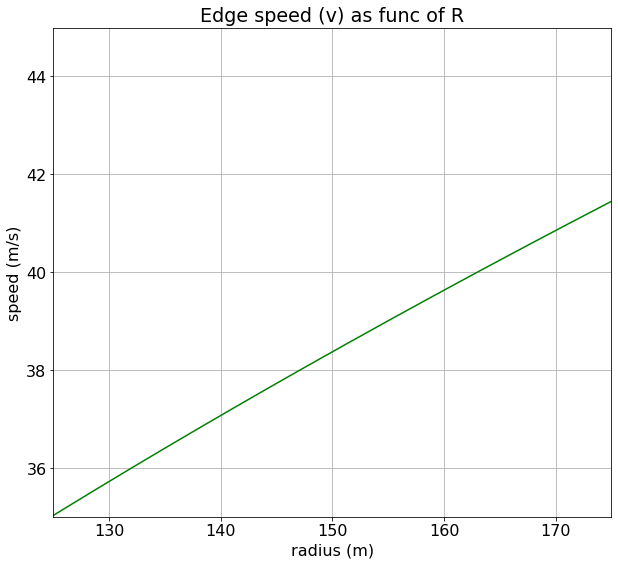

In [8]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.plot(range_radius, speed_r,
            color = 'green')

# draw a horizontal or vertical line across the plot to show some feature
#ax2.hlines(0, 0, 4,
#         color = 'magenta', linestyle = '-',
#         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='radius (m)', ylabel='speed (m/s)',
       title='Edge speed (v) as func of R')

ax2.set_xlim([125,175])
ax2.set_ylim([35,45])
fig2.set_size_inches(10, 9)
ax2.grid()

#plt.legend(loc= 4)
plt.show()

### What about the relationship between the period and the radius

This requires that I notice that there is an explicit relationship between the speed and the period of the rotation. I went back to my calculational cell and built it.

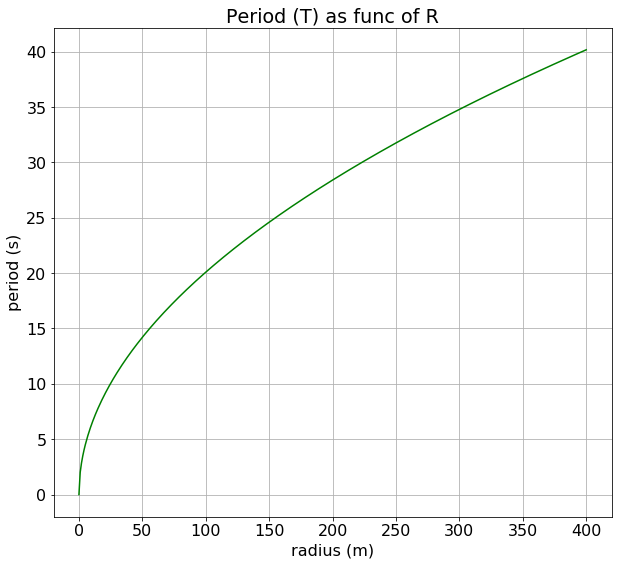

In [5]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.plot(range_radius, period_r,
             color = 'green')

# draw a horizontal or vertical line across the plot to show some feature
#ax2.hlines(0, 0, 4,
#         color = 'magenta', linestyle = '-',
#         linewidth = 2., label = "ground level")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='radius (m)', ylabel='period (s)',
       title='Period (T) as func of R')


fig2.set_size_inches(10, 9)
ax2.grid()

#plt.legend(loc= 4)
plt.show()

### Pick a radius

From the plots above it suggests I could pick a radius that meets at least one of the criteria for this problem. Now that I have pickd an outer radius for the space station I can use the speed or period from the plots to calculate the gravity 20 m 'above' the floor. 

The plot below shows an unexpected and erroneous result that tends to happen a lot. Notice that the plot shows gravity getting greater as you get closer to the center of the space station. This is the result of a thinking error. When it is corrected you will get a happier result.

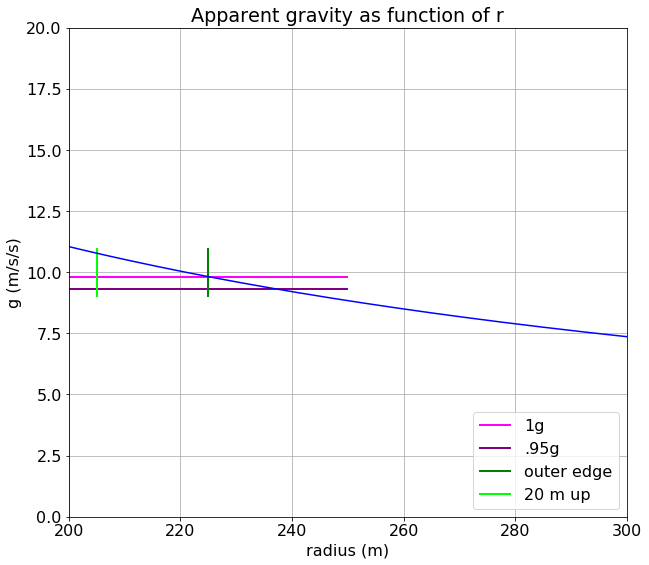

In [6]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.plot(range_radius, twenty_up,
             color = 'blue')

# draw a horizontal or vertical line across the plot to show some feature
ax2.hlines(gravity, 200, 250,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "1g")
ax2.hlines(.95*gravity, 200, 250,
         color = 'purple', linestyle = '-',
         linewidth = 2., label = ".95g")

ax2.vlines(225, 9, 11,
         color = 'green', linestyle = '-',
         linewidth = 2., label = "outer edge")
ax2.vlines(205, 9, 11,
         color = 'lime', linestyle = '-',
         linewidth = 2., label = "20 m up")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='radius (m)', ylabel='g (m/s/s)',
       title='Apparent gravity as function of r')

ax2.set_xlim([200,300])
ax2.set_ylim([0,20])
fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 4)
plt.show()

### Happier Result

I also included some reference lines to help me see what is going on. I have a horizontal line at 1g and another at .95 g. I have a vertical line at my max radius and another one 20 m closer to the center. Remember that the requirement is that gravity change by no more than 5% over 20 m. Notice that my current solution does **NOT** meet that criteria. What shall I do?

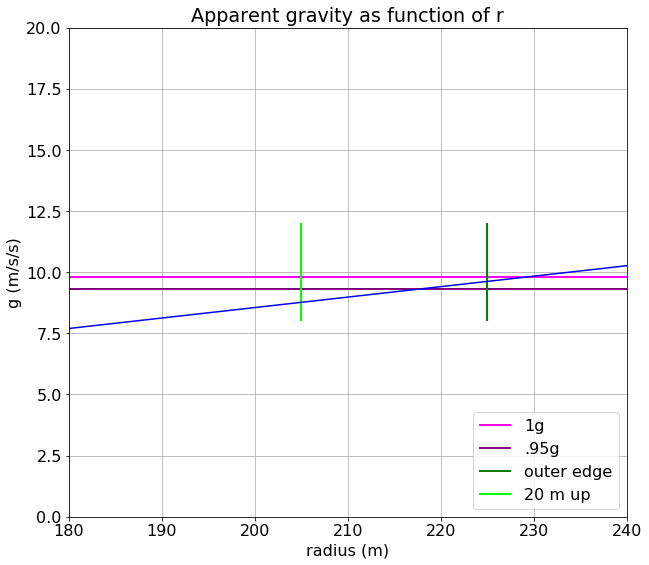

In [7]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.plot(range_radius, twenty_better,
             color = 'blue')

# draw a horizontal or vertical line across the plot to show some feature
ax2.hlines(gravity, 180, 240,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "1g")
ax2.hlines(.95*gravity, 180, 240,
         color = 'purple', linestyle = '-',
         linewidth = 2., label = ".95g")

ax2.vlines(225, 8, 12,
         color = 'green', linestyle = '-',
         linewidth = 2., label = "outer edge")
ax2.vlines(205, 8, 12,
         color = 'lime', linestyle = '-',
         linewidth = 2., label = "20 m up")

plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='radius (m)', ylabel='g (m/s/s)',
       title='Apparent gravity as function of r')

ax2.set_xlim([180,240])
ax2.set_ylim([0,20])
fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 4)
plt.show()

### Presentation of calculations and proof of criteria

In this markdown cell you should present the actual results of your calculations along with references to the plots and other places where those results are determined. You are also asked to show that the radial accelerations due to your motion around the earth are small compared to the ones in the space station.

### Dropped Ball

Describe with clarity what happens to a ball that I let go of as I am standing on the 'ground' in this space station. From the other information you have from this lab calculate the time it takes this 'dropped' ball to hit the 'ground'. How does this compare to a dropped ball on earth? Are there any observable differences?

<img src="images/cross-section.jpg" width="400" height="400" />


### Discussion: 

What did you learn? 